## 고유값 구하기

행렬 연산을 위하여 라이브러리를 호출한다. 

In [1]:
import numpy as np 
import sympy as sp
import math
from numpy.linalg import linalg

## 행렬의 대각화

sympy에서는 행렬을 다음과 같이 정의하고, 고유값은 eigenvals 이라는 명령어로 구한다.
고유벡터를 찾는 명령어는 a.eigenvects()이다.

출력물에서 :의 오른쪽은 승수를 말한다.

In [2]:
a=sp.Matrix([[1, 2], [3, 2]])
a.eigenvals()

{4: 1, -1: 1}

In [3]:
a.eigenvects()

[(-1,
  1,
  [Matrix([
   [-1],
   [ 1]])]),
 (4,
  1,
  [Matrix([
   [2/3],
   [  1]])])]

대각화는 다음의 명령어를 사용하여 구한다. 


In [4]:
M = sp.Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
P, D = M.diagonalize()

In [5]:
P

Matrix([
[0, 1, 1,  0],
[1, 1, 1, -1],
[1, 1, 1,  0],
[1, 1, 0,  1]])

In [6]:
D

Matrix([
[-2, 0, 0, 0],
[ 0, 3, 0, 0],
[ 0, 0, 5, 0],
[ 0, 0, 0, 5]])

대각화가 잘 되었는지를 점검해보자. 

In [7]:
P**-1 * M * P == D

True

파이썬에서는 sympy 라는 라이브러리보다는 numpy를 더 많이 사용한다. numpy로도 비슷한 계산을 해보자.

In [8]:
a=np.array([[1, 2], [3, 2]])
linalg.eigvals(a)

array([-1.,  4.])

In [9]:
linalg.eig(a)

(array([-1.,  4.]),
 array([[-0.70710678, -0.5547002 ],
        [ 0.70710678, -0.83205029]]))

행렬의 대각화를 해보도록 하자.

In [10]:
M = np.array([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
M

array([[ 3, -2,  4, -2],
       [ 5,  3, -3, -2],
       [ 5, -2,  2, -2],
       [ 5, -2, -3,  3]])

In [11]:
d, V = linalg.eig(M)
V_inv = linalg.inv(V)
lambdas = np.diag(d)

V.dot(lambdas).dot(V_inv)

array([[ 3., -2.,  4., -2.],
       [ 5.,  3., -3., -2.],
       [ 5., -2.,  2., -2.],
       [ 5., -2., -3.,  3.]])

## 특이값 분해

In [12]:
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]
(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [13]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [14]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

## 참고: 고유벡터의 표현

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

(-1.0, 4.0)

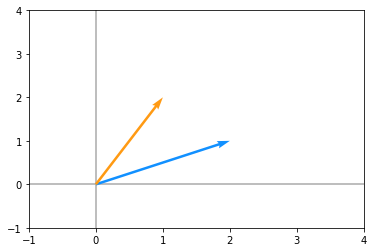

In [16]:
A = np.array([[-1, 3], [2, -2]])
v = np.array([[2], [1]])

Av = A.dot(v) 
plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

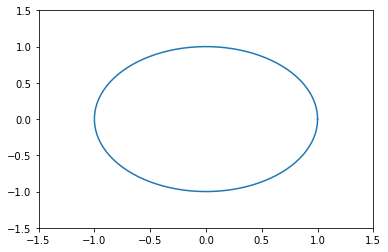

In [17]:
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = np.sin(t)

plt.figure()
plt.plot(x, y)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

In [18]:
def linearTransformation(transformMatrix):
    orange = '#FF9A13'
    blue = '#1190FF'
    # Create original set of unit vectors
    t = np.linspace(0, 2*np.pi, 100)
    x = np.cos(t)
    y = np.sin(t)

    # Calculate eigenvectors and eigenvalues
    eigVecs = np.linalg.eig(transformMatrix)[1]
    eigVals = np.diag(np.linalg.eig(transformMatrix)[0])

    # Create vectors of 0 to store new transformed values
    newX = np.zeros(len(x))
    newY = np.zeros(len(x))
    for i in range(len(x)):
        unitVector_i = np.array([x[i], y[i]])
        # Apply the matrix to the vector
        newXY = transformMatrix.dot(unitVector_i)
        newX[i] = newXY[0]
        newY[i] = newXY[1]

    plotVectors([eigVecs[:,0], eigVecs[:,1]],
                cols=[blue, blue])
    plt.plot(x, y)

    plotVectors([eigVals[0,0]*eigVecs[:,0], eigVals[1,1]*eigVecs[:,1]],
                cols=[orange, orange])
    plt.plot(newX, newY)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

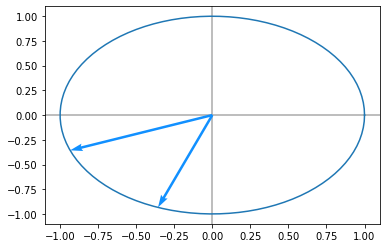

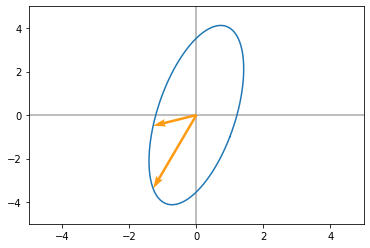

In [19]:
A = np.array([[1,1], [-1, 4]])
linearTransformation(A)

## 참고문헌
1. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.7-Eigendecomposition/
2. http://people.duke.edu/~ccc14/sta-663-2016/07_LinearAlgebra2.html
3. https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-20-%ED%8A%B9%EC%9D%B4%EA%B0%92-%EB%B6%84%ED%95%B4Singular-Value-Decomposition